## This Notebook was created on Google Colab.
* This Notebook is for Data Exploration only.
* Other Notebooks will be created for the remaining project stages.

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install scipy==1.1.0


In [0]:
import zipfile
with zipfile.ZipFile('drive/My Drive/unaugmented_data.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Imports 

In [0]:
import pandas as pd
from scipy.misc import imread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG

%matplotlib inline

# Loading Data

## Dataset Overview:
* This dataset was created/collected by me.
* The dataset was collected through driving an RC car mounted with a monocam in a track made with white plastic sheets.
* Sampling rate used for capturing frames is 5 fps to avoid redundant frames.
* The dataset consists of three classes (FORWARD, RIGHT, LEFT) which corresponds to the control action related to a captured frame.
* This dataset will be used throughout my project **In-Lane Self-driving Car**. 

In [6]:
data= pd.read_csv("labels_unaugmented.csv")
data.drop(["Unnamed: 0"], axis=1,inplace=True)
data.head(10)

,img,forward,right,left
0,0.jpg,1,0,0
1,1.jpg,1,0,0
2,2.jpg,1,0,0
3,3.jpg,1,0,0
4,4.jpg,1,0,0
5,5.jpg,1,0,0
6,6.jpg,0,0,1
7,7.jpg,0,0,1
8,8.jpg,0,0,1
9,9.jpg,1,0,0


# Data Exploration

## Image shape:

In [7]:
sample= np.array(imread('unaugmented_data/'+data.img.iloc[0]))
print("Each image in the dataset is an RGB image with shape {}\n\n".format(sample.shape))

Each image in the dataset is an RGB image with shape (256, 455, 3)




## Plotting class ratios in dataset:

In [8]:
# Getting the ratio of each class in the dataset.
forward_class= data.forward[data['forward']==1].count()
right_class=data.right[data['right']==1].count()
left_class=data.left[data['left']==1].count()
#Checking for non-valid records
not_valid=data.left[(data['left']==0) & (data['right']==0) & (data['forward']==0)].count()
total=data.img.count()
print("Total number of records: {}".format(total))
print("Percentage of forward class records {}".format(forward_class/total))
print("Percentage of right class records {}".format(right_class/total))
print("Percentage of left class records {}".format(left_class/total))
print("Percentage of non-valid records {}".format(not_valid/total))



Total number of records: 15700
Percentage of forward class records 0.4194904458598726
Percentage of right class records 0.3026751592356688
Percentage of left class records 0.27719745222929937
Percentage of non-valid records 0.0006369426751592356


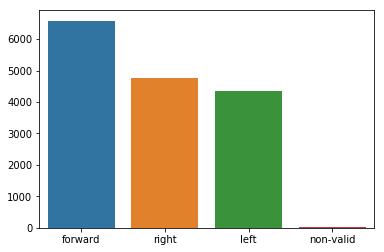

In [9]:
classes=[ 'forward', 'right', 'left', 'non-valid']
percentages= [forward_class, right_class, left_class, not_valid]
sns.barplot(x=classes, y=percentages)

* **Note**: The non-valid records will be dealt with in the preprocessing section of the project to preserve consistency.

## Plotting sample images from each class:

In [0]:
forward = data[data['forward']==1].sample(n=3,random_state=123)
left= data[data['left']==1].sample(n=3, random_state=123)
right= data[data["right"]==1].sample(n=3, random_state=123)

In [0]:
base_path= 'unaugmented_data'
forward_imgs = np.array([np.int32(imread('/'.join([base_path, im]))) for im in forward.img])
right_imgs = np.array([np.int32(imread('/'.join([base_path, im]))) for im in right.img])
left_imgs = np.array([np.int32(imread('/'.join([base_path, im]))) for im in left.img])



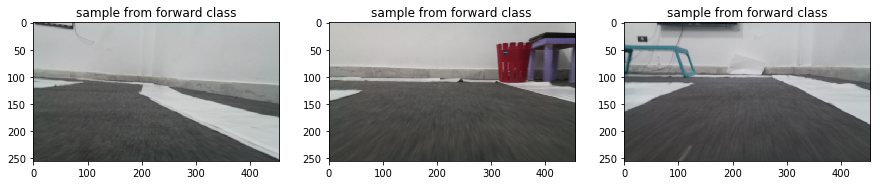

In [12]:
fig = plt.figure(1,figsize=(15,15))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    plt.title('sample from forward class')
    ax.imshow(forward_imgs[i])
plt.show()


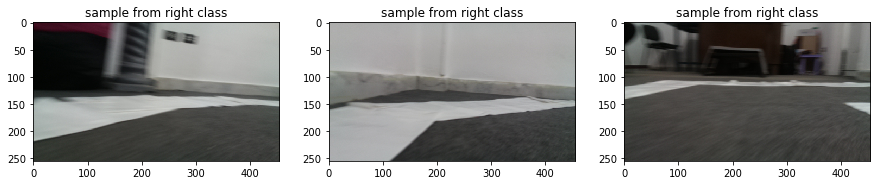

In [13]:
fig = plt.figure(1,figsize=(15,15))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    plt.title('sample from right class')
    ax.imshow(right_imgs[i])
plt.show()


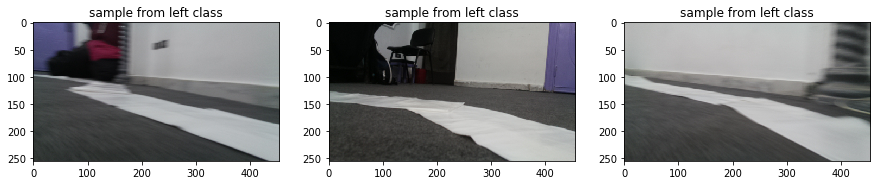

In [14]:
fig = plt.figure(1,figsize=(15,15))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    plt.title('sample from left class')
    ax.imshow(left_imgs[i])
plt.show()


## This is the End of data exploration.
* Data Augmentation will be discussed in a separate Notebook.
* Training and evaluation will be discussed in a separate Notebook.

# Data Preprocessing


## Data Augmentation:

### 1. Flipping

In [15]:
import cv2

n= data.index.max()+1

for i in range (0,n):
  if (data['right'][i]==1):
      #print("right")
      image=cv2.imread('/'.join([base_path, data.img[i]]))
      cv2.flip(image,1,image)
      cv2.imwrite(base_path+'/'+str(n+i)+".jpg",image)
      data.loc[data.index.max()+1] = [str(n+i)+".jpg"] + list([0,0,1])
      
  if (data['left'][i]==1):
      #print("left")
      image=cv2.imread('/'.join([base_path, data.img[i]]))
      cv2.flip(image,1,image)
      cv2.imwrite(base_path+'/'+str(n+i)+".jpg",image)
      data.loc[data.index.max()+1] = [str(n+i)+".jpg"] + list([0,1,0])
      
  if (data['forward'][i]==1):
      #print("forward")
      image=cv2.imread('/'.join([base_path, data.img[i]]))
      cv2.flip(image,1,image)
      cv2.imwrite(base_path+'/'+str(n+i)+".jpg",image)
      data.loc[data.index.max()+1] = [str(n+i)+".jpg"] + list([1,0,0])
      
  if i%3000==0:
    print("Working..")
      




Working..
Working..
Working..
Working..
Working..
Working..


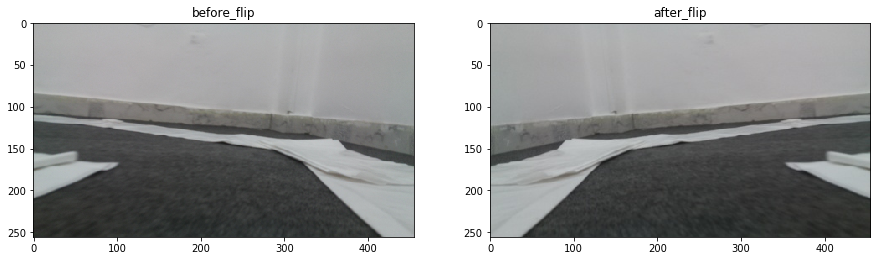

In [16]:
before_flip=imread(base_path+'/'+data.img[14])
after_flip=imread(base_path+'/'+data.img[14+n])
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(1,2,1)
plt.title('before_flip')
ax.imshow(before_flip)
ax = fig.add_subplot(1,2,2)
plt.title('after_flip')
ax.imshow(after_flip)

plt.show()



### 2. Brightness/contrast 

In [18]:
n= data.index.max()+1
brightness=-50
contrast=40

for i in range(0,n):
  
  if i%3000==0:
    print("Working..")
    
  input_img=cv2.imread('/'.join([base_path, data.img[i]]))
  if np.all(input_img==None):
    print("ERROR!")
    break
  if brightness != 0:
          if brightness > 0:
              shadow = brightness
              highlight = 255
          else:
              shadow = 0
              highlight = 255 + brightness
          alpha_b = (highlight - shadow)/255
          gamma_b = shadow

          buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
  else:
      buf = input_img.copy()

  if contrast != 0:
      f = 131*(contrast + 127)/(127*(131-contrast))
      alpha_c = f
      gamma_c = 127*(1-f)

      buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)
  else:
      buf = input_img.copy()
      
  cv2.imwrite(base_path+'/'+str(n+i)+".jpg",buf)
  data.loc[data.index.max()+1] = [str(n+i)+".jpg"] + list([data['forward'][i] ,data['right'][i] , data['left'][i]])


Working..
Working..
Working..
Working..
Working..
Working..
Working..
Working..
Working..
Working..
Working..


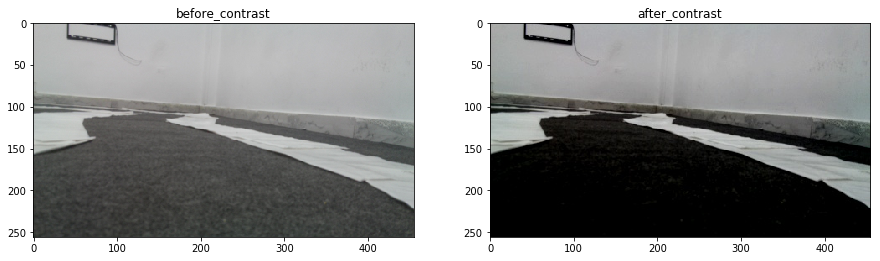

In [21]:
before_contrast=imread('/'.join([base_path, data.img[0]]))
after_contrast=imread('/'.join([base_path, data.img[0+n]]))
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(1,2,1)
plt.title('before_contrast')
ax.imshow(before_contrast)
ax = fig.add_subplot(1,2,2)
plt.title('after_contrast')
ax.imshow(after_contrast)

plt.show()


### Augmented_Data was uploaded to google drive to load it directly when the session timeouts instead of rerunning the augmentation code to save time.